In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from PSyn import matrix_functions
from PSyn import brain
import os
import time
SOURCE_DATA_PATH = 'data/task1/dev/'
from collections import Counter

In [6]:
source_files = os.listdir(SOURCE_DATA_PATH)
source = 'polish-train-high'
# source_files = ['polish-train-medium']

start = time.time()
# for source in source_files:
print(source)
prf, total_corect, global_attr, total_entries, correct_inflections, macro_prf = brain.test_model_accuracy(source, classifier='decision_tree', fasttext_test=True)
# print(time.time() - start)
start = time.time()
print('Macro PRF:', )
print('Guessed %d inflections correctly out of %d.\nAccuracy: %f' % (total_corect, total_entries, (total_corect * 100 / float(total_entries))))

polish-train-high
Total Alphabets:
{'e', 'o', 'C', 'j', 'i', 'W', 'Ż', 'r', 'ó', 'G', 'd', 'n', 'ą', 'z', 'l', 'ś', 'c', 's', 't', 'ń', 'B', 'm', 'w', 'ę', 'ż', 'ł', 'g', 'ć', 'y', 'b', 'p', 'a', 'k', 'h', 'ź', ' ', 'M', 'u', 'R', 'f'}
Epsilon: 9.000000
Ci: 40.000000


/home/gaurav/python-scripts/py/scripts/pg_project/BTP-ProgSyn/program_synthesis/PSyn/brain.py:421: RuntimeWarning: divide by zero encountered in true_divide
  fF = 2 / np.sum(1/np.array([pP, rR]))
/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ones and zeros 162 12047
Macro PRF:
Guessed 181 inflections correctly out of 421.
Accuracy: 42.992874


In [ ]:
source_files = os.listdir(SOURCE_DATA_PATH)
source = 'polish-train-high'
# source_files = ['polish-train-medium']

start = time.time()
# for source in source_files:
print(source)
prf, total_corect, global_attr, total_entries, correct_inflections, macro_prf = brain.test_model_accuracy(source, classifier='random_forest')
# print(time.time() - start)
start = time.time()
print('Macro PRF:', )
print('Guessed %d inflections correctly out of %d.\nAccuracy: %f' % (total_corect, total_entries, (total_corect * 100 / float(total_entries))))

In [7]:
global_attr

0.42992874109263657

In [8]:
source_csv = open('data/task1/dev/polish-dev', 'r')
dict_for_df = {'source': [], 'target': [], 'source_node': [], 'pos': []}
content = source_csv.readlines()
for line in content:
    row = line.split('\t')
    dict_for_df['source'].append(row[0])
    dict_for_df['target'].append(row[1])
    dict_for_df['source_node'].append(
        row[0] + '-' + row[2].strip().replace(';', '_'))
    dict_for_df['pos'].append(row[2].split(';')[0])
source_df = pd.DataFrame.from_records(dict_for_df)
source_df = source_df[source_df['pos'] == 'N']
idx = source_df.index[source_df['source_node'] == 'Cezar-N_DAT_PL']
list(source_df.loc[idx]['target'])

['Cezarom']

In [9]:
o = pd.DataFrame.from_dict(correct_inflections)
ops_ = {}
for key in o.columns.values:
    ops_[key] = []
    for i, _ in enumerate(o[key]):
        if _:
            ops_[key].append(o[key].index.values[i])
t = []
for s_node in list(ops_.keys()):
    idx = source_df.index[source_df['source_node'] == s_node]
    t.append(list(source_df.loc[idx]['target'])[0])
pd.DataFrame.from_dict({'source': list(ops_.keys()), 'opn_sequence': list(ops_.values()), 'target': t})

,opn_sequence,source,target
0,"[ins_m_7_1, ins_o_6_0]",Cezar-N_DAT_PL,Cezarom
1,"[del_n_9_-1, ins_e_9_-1]",Marsjanin-N_VOC_PL,Marsjanie
2,[ins_a_10_0],Rzymianin-N_GEN_SG,Rzymianina
3,"[ins_c_9_0, ins_h_10_1]",Węgierka-N_ESS_PL,Węgierkach
4,"[del_o_8_-1, del_ł_7_-2, ins_e_8_-1, ins_l_7_-2]",abecadło-N_ESS_SG,abecadle
5,"[ins_m_12_1, ins_o_11_0]",abiturient-N_DAT_PL,abiturientom
6,"[ins_w_8_1, ins_ó_7_0]",absurd-N_GEN_PL,absurdów
7,"[ins_e_7_0, ins_m_8_1]",aceton-N_INS_SG,acetonem
8,[ins_y_7_0],adwent-N_VOC_PL,adwenty
9,"[ins_i_10_-5, ins_o_8_-7, ins_w_9_-6]",adwokat diabła-N_DAT_SG,adwokatowi diabła


In [10]:
prf_values = list(prf.values())
prf_keys = list(prf.keys())
prf_df = pd.DataFrame.from_dict({'operation': [_.split('_')[0] for _ in prf_keys],
                                 'char': [_.split('_')[1] for _ in prf_keys],
                                 'lpos': [_.split('_')[2] for _ in prf_keys],
                                 'rpos': [_.split('_')[3] for _ in prf_keys],
                                 'precision': [_[0] for _ in prf_values],
                                 'recall': [_[1] for _ in prf_values],
                                 'f_score': [_[2] for _ in prf_values]})
display(prf_df.head())
P = [ e[0] for e in list(prf.values())]
R = [ e[1] for e in list(prf.values())]
F = [ e[2] for e in list(prf.values())]
print(np.mean(P), np.mean(R), np.mean(F))

,char,f_score,lpos,operation,precision,recall,rpos
0,a,0.482165,10,del,0.482759,0.481572,-1
1,a,0.492159,11,del,0.495146,0.489209,-1
2,a,0.492771,12,del,0.492771,0.492771,-1
3,a,0.498810,13,del,0.498810,0.498810,-1
4,a,0.495808,14,del,0.497596,0.494033,-1


0.497092498031 0.496806813752 0.496904135309


Model-wise boxplots for full-length bitstrings


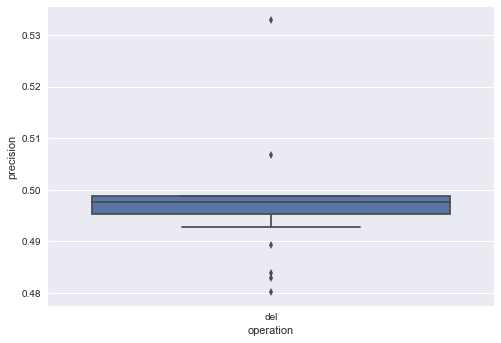

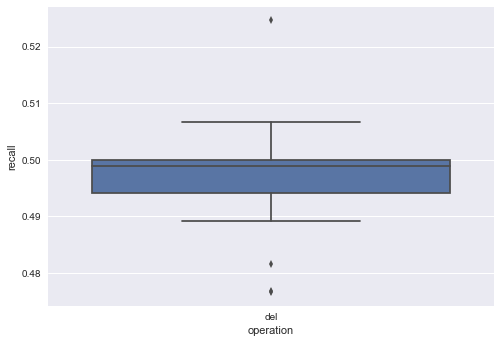

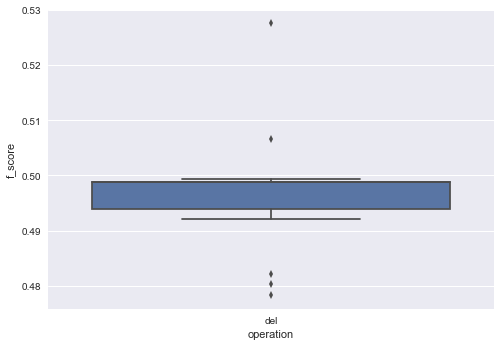

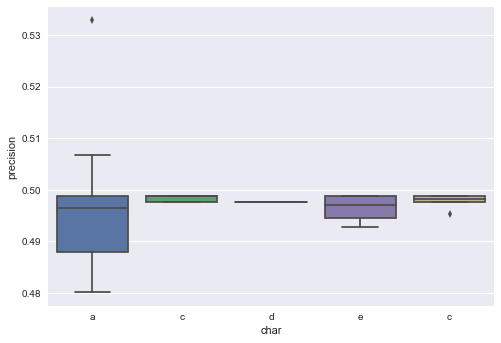

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Model-wise boxplots for full-length bitstrings')
plt.clf()
box_plot = sns.boxplot(x='operation', y='precision', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='operation', y='recall', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='operation', y='f_score', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='char', y='precision', data=prf_df)
display(box_plot.get_figure())

In [ ]:
# Load graphs of classifiers
import pickle
import os
from sklearn import tree
LABELS_PATH = 'data/task1/output/labels/'
labels = pickle.load(open(LABELS_PATH + 'polish-train-high.p', 'rb'))
clf_path = 'data/task1/output/prediction/polish-train-high/'
features = pickle.load(open('feature_map_polish.p', 'rb')).keys()
dtrees = [pickle.load(open(clf_path + clf, 'rb')) for clf in os.listdir(clf_path)]
for i, t in enumerate(os.listdir(clf_path)):
    if 'decision_tree.p' not in t:
        continue
    tree.export_graphviz(dtrees[i], out_file='dotfiles/' + t.replace('.p', '.dot'), feature_names=list(features))

In [ ]:
from subprocess import check_call
for dot_f in os.listdir('dotfiles/'):
    check_call(['dot','-Tpng',('dotfiles/' + dot_f),'-o','pngs/' + dot_f.replace('.dot', '.png')])

In [ ]:
for i, t in enumerate(os.listdir(clf_path)):
    if 'decision_tree.p' in t:
        continue
    feature_importances = dtrees[i].feature_importances_
    
    